In [3]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import OneHotEncoder

# Question 1
Here, I used ordinal encoding to assign numbers to the education levels, since they have an inherent order. The same goes for the marital status, because more people in a house means more spending on groceries.

In [38]:
personality_df = pd.read_csv('marketing_campaign.csv', delimiter="\t")
df = pd.DataFrame({'edu': ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']})
quality_map = {'Basic':0, "Graduation":1, "2n Cycle":2, "Master":3, "PhD":4}
personality_df['Education'] = df['edu'].map(quality_map)

df2 = pd.DataFrame({'marital': ['Absurd', 'Alone', 'Divorced', 'Married', 'Single', 'Together', 'Widow', 'YOLO']})
quality2 = {'Absurd':0, 'Alone':0, 'Divorced':0, 'Single':0, 'Widow':0, 'YOLO':0, 'Together':1, 'Married':2}
personality_df['Marital_Status'] = df2['marital'].map(quality2)
personality_df = personality_df.drop('Dt_Customer', axis=1)
personality_df = personality_df.fillna(0)
personality_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0.0,0.0,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,1.0,0.0,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2.0,0.0,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,3.0,2.0,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4.0,0.0,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0


# Question 2

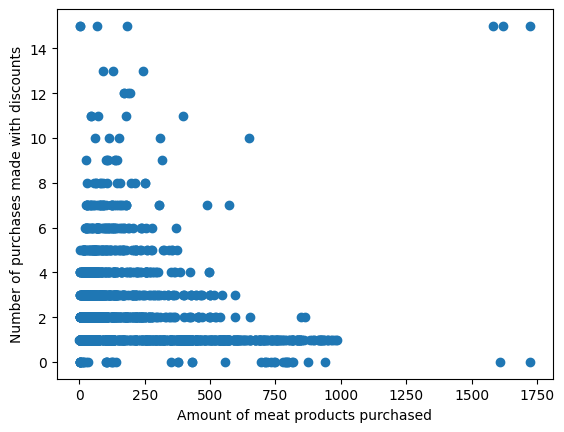

In [39]:
x = personality_df.drop('Income', axis=1)
y = personality_df['Income']

plt.scatter(x['MntMeatProducts'], x['NumDealsPurchases'])
plt.xlabel('Amount of meat products purchased')
plt.ylabel('Number of purchases made with discounts')
plt.show()

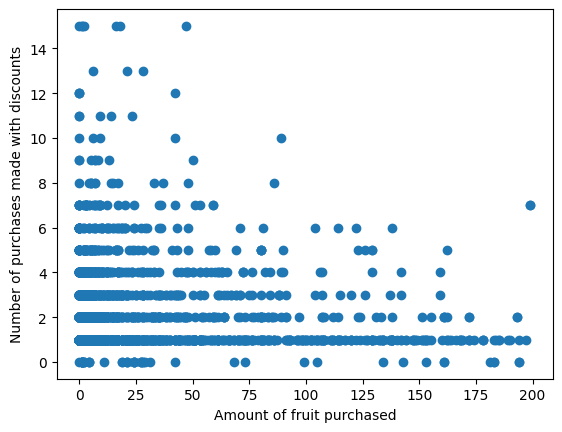

In [51]:
plt.scatter(x['MntFruits'], x['NumDealsPurchases'])
plt.xlabel('Amount of fruit purchased')
plt.ylabel('Number of purchases made with discounts')
plt.show()

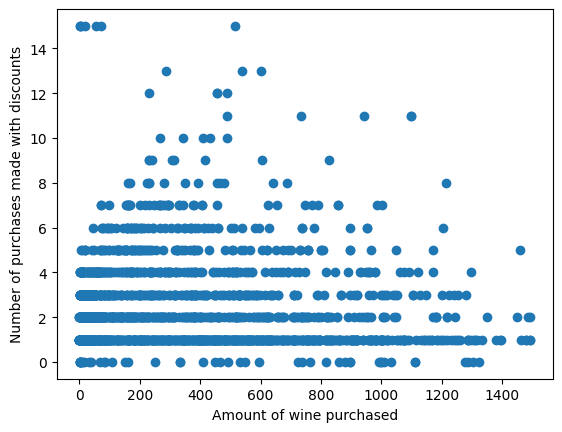

In [52]:
plt.scatter(x['MntWines'], x['NumDealsPurchases'])
plt.xlabel('Amount of wine purchased')
plt.ylabel('Number of purchases made with discounts')
plt.show()

Text(0.5, 1.0, 'Elbow Method with Distortion')

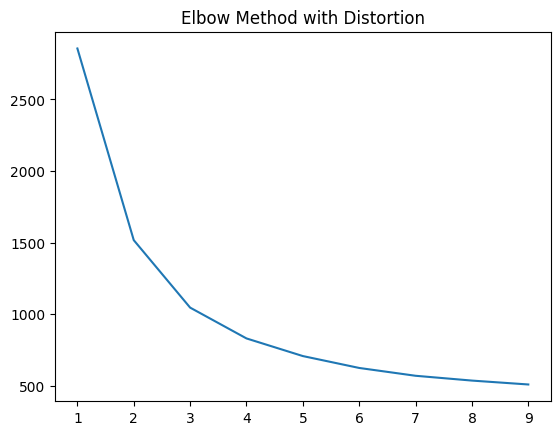

In [53]:
inertias = []
distortions = []

for k in range(1,10):
    model = KMeans(n_clusters=k).fit(x)
    distance = cdist(x, model.cluster_centers_,
                     'euclidean')
    distortion = sum(np.min(distance, axis=1))/x.shape[0]
    distortions.append(distortion)
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10), distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

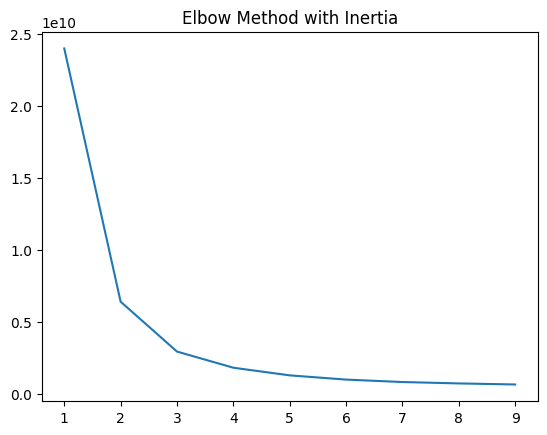

In [54]:
plt.plot(range(1,10), inertias)
plt.title('Elbow Method with Inertia')

I decided to sort by income because that dictates how much a person can buy, and what people tend to prioritize at lower incomes. You can see that on both methods, the elbow lies near 2 or 3, so that would be the optimal number of clusters for this specific approach.

# Question 3

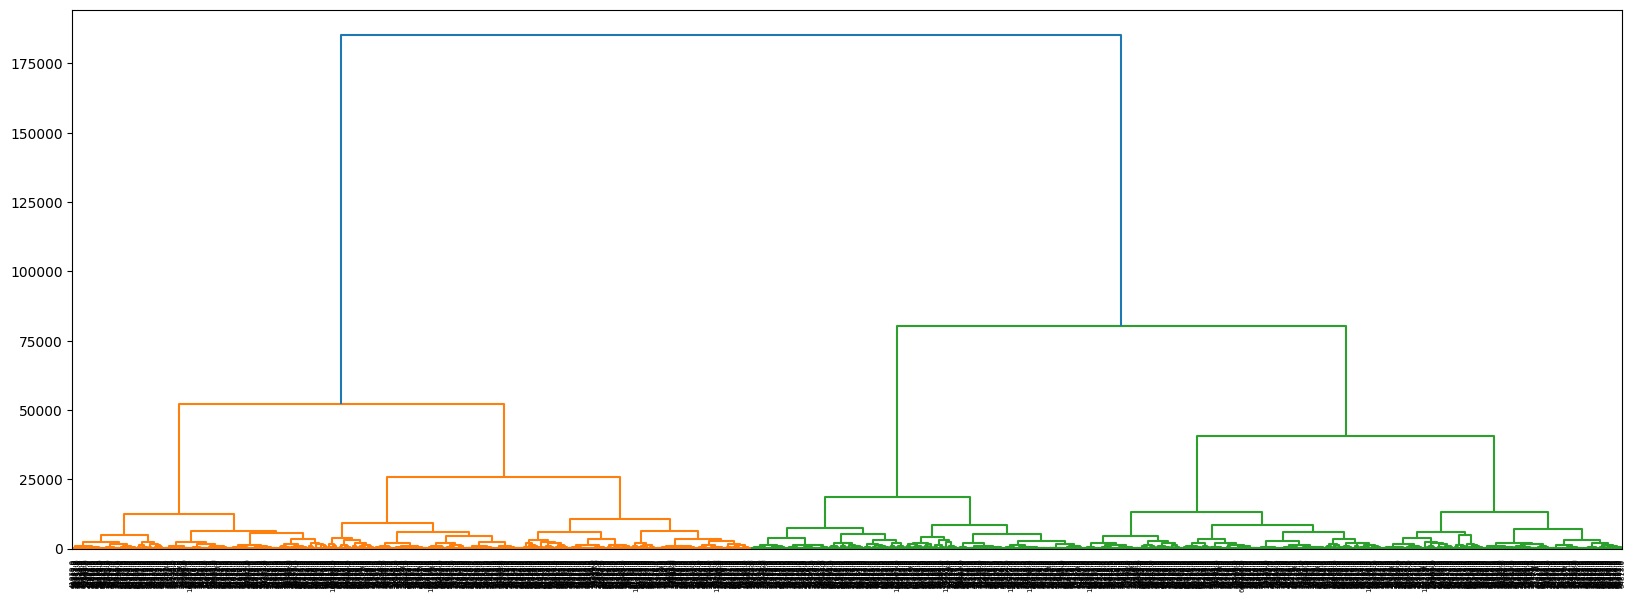

In [76]:
linked = linkage(x, 'ward')
plt.figure(figsize=(20,7))

dendro = dendrogram(linked, labels = list(y))

In [77]:
cluster = AgglomerativeClustering(n_clusters=4,linkage='ward')
cluster.fit_predict(x)

array([2, 1, 1, ..., 2, 0, 0])

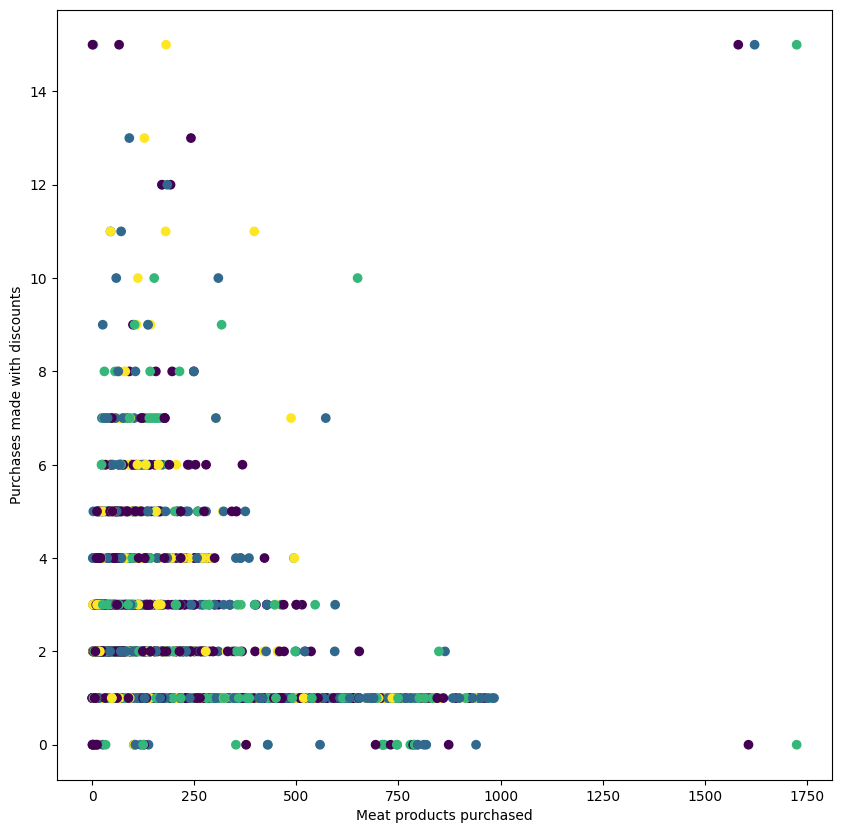

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(x['MntMeatProducts'],x['NumDealsPurchases'],c=cluster.labels_)
plt.xlabel('Meat products purchased')
plt.ylabel('Purchases made with discounts')
plt.show()

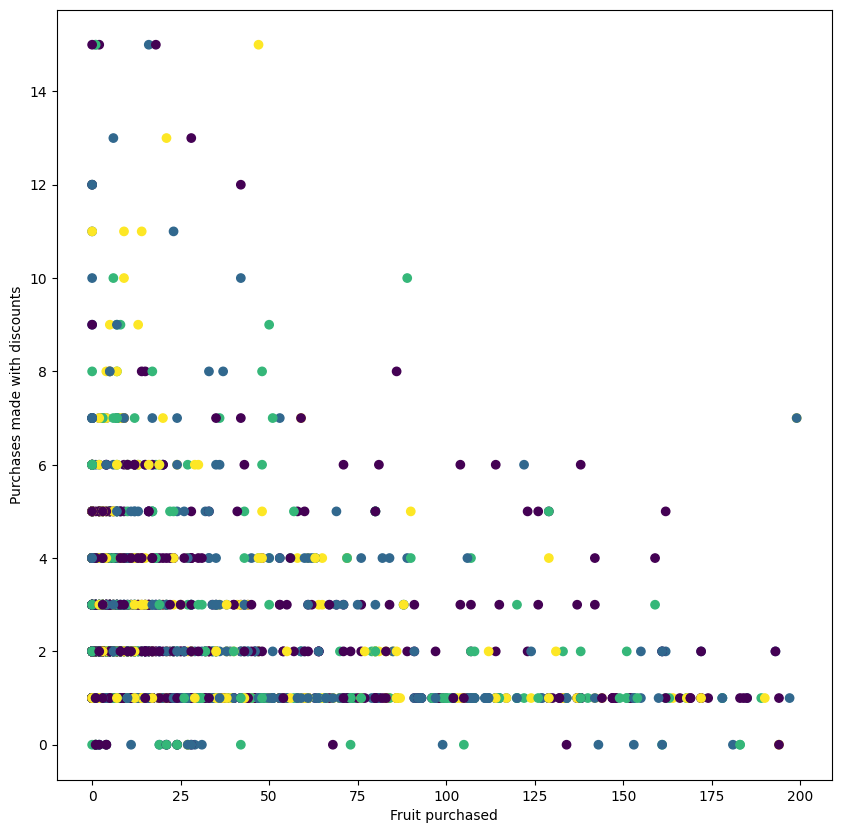

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(x['MntFruits'],x['NumDealsPurchases'],c=cluster.labels_)
plt.xlabel('Fruit purchased')
plt.ylabel('Purchases made with discounts')
plt.show()

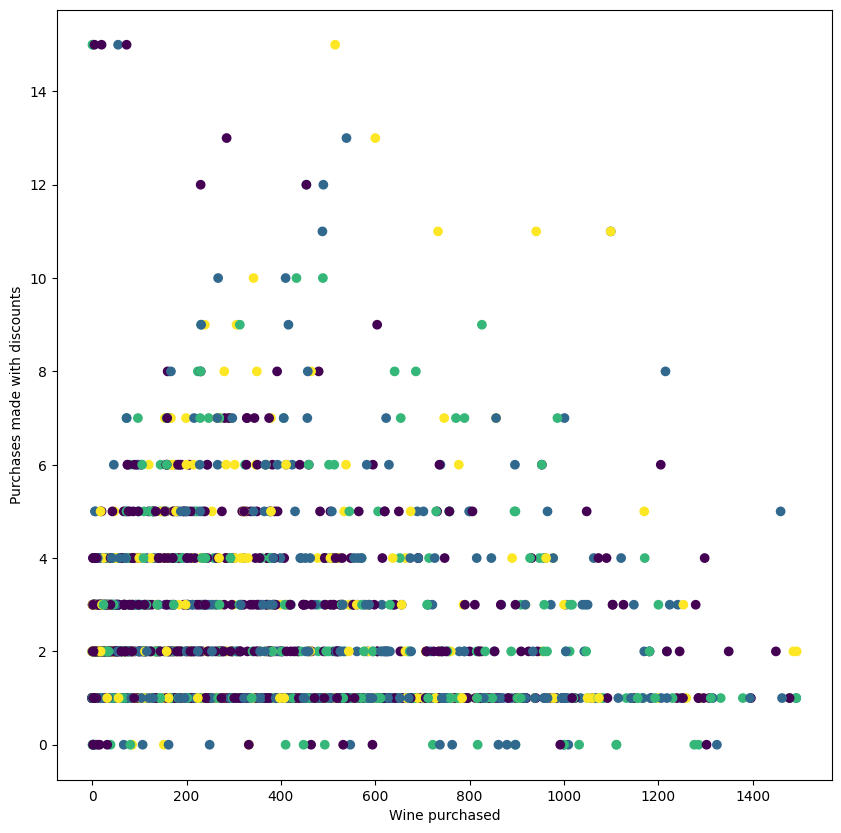

In [80]:
plt.figure(figsize=(10,10))
plt.scatter(x['MntWines'],x['NumDealsPurchases'],c=cluster.labels_)
plt.xlabel('Wine purchased')
plt.ylabel('Purchases made with discounts')
plt.show()

I chose four clusters because the dendrogram starts to lose a lot of distinction after four clusters.

# Question 4
I preferred to use K-Means and the elbow method because it was easier for me to read. The text at the bottom of the dendrogram is a bit... funky. Plus, when using the hierarchical method, it didn't appear to have any distinct separation between the clusters on the scatterplot. However, the hierarchical one has slightly more clusters, so I figure it's probably better for more experienced data scientists.